In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,   consensus_score, ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("fraud.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

In [5]:
# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [6]:
# Filling missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
# Split features and target 
X = df.drop(['is_fraud', 'fraud_type'], axis=1)
y = df['is_fraud']

In [8]:
# Scale feautures
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
### EVALUATION FUNCTION
def evaluate_model(true,predicted):
    acc = accuracy_score(true,predicted)
    prec = precision_score(true, predicted)
    rec = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    roc = roc_auc_score(true, predicted)
    return acc, prec, rec, f1, roc

In [11]:
### Models
models = {
    "LogisticRegression": LogisticRegression(),
  #  "KNN": KNeighborsClassifier(),
  #  "Decision Tree": DecisionTreeClassifier(),
  #  "Random Forest": RandomForestClassifier(),
  #  "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
  #  "SVM": SVC(probability=True)
}

\LogisticRegression
 Accuracy: 0.9642
 Precision: 0.0000
 Recall: 0.0000
 F1 Score: 0.0000
 ROC-AUC: 0.5000


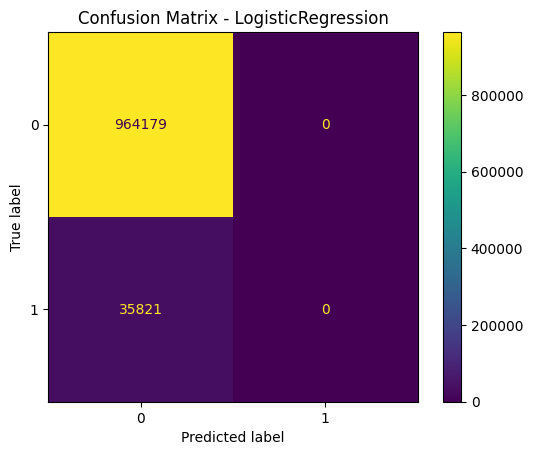

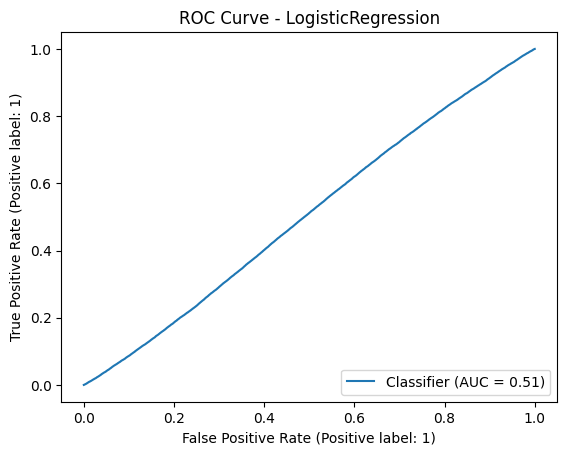

In [12]:
## Training and Evaluation
model_list=[]
f1_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc, prec,rec, f1, roc = evaluate_model(y_test, y_pred)

    print(f"\{name}")
    print(f" Accuracy: {acc:.4f}")
    print(f" Precision: {prec:.4f}")
    print(f" Recall: {rec:.4f}")
    print(f" F1 Score: {f1:.4f}")
    print(f" ROC-AUC: {roc:.4f}")
    print("=" * 40)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show

    # ROC Curve
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"ROC Curve - {name}")
    plt.show()

    # Store results
    model_list.append(name)
    f1_list.append(f1)

In [13]:
# Create DataFrame of model performance
results_df = pd.DataFrame(list(zip(model_list, f1_list)), columns=['Model Name', 'F1_Score'])

# Sort by F1 Score
results_df = results_df.sort_values(by='F1_Score', ascending=False)

# Display the results
print(results_df)


           Model Name  F1_Score
0  LogisticRegression       0.0


In [14]:
log_model = LogisticRegression(max_iter=1000)
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 96.42


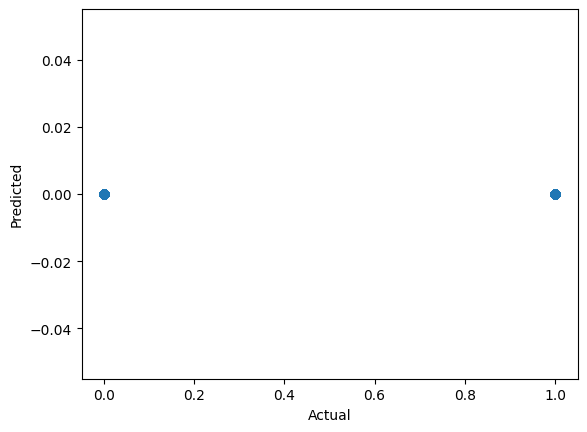

In [15]:
## Plot y_test and y_pred
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='is_fraud'>

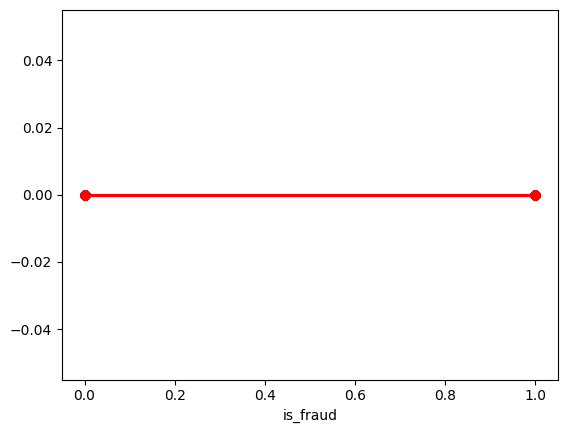

In [16]:
sns.regplot(x=y_test, y=y_pred, ci=None,color='red')

In [19]:
## Difference between Actual and Predicted Values
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test ^ y_pred  # Will be 1 for mismatch, 0 for match
})